In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [2]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [3]:
articles = []
labels = []

with open("bbc-text.csv",'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    next(reader) #if not passed then it will also include the label of csv i.e category and text
    #it removes the first header
    for row in reader:
        labels.append(row[0])
        #print(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = " " + word + " "
            article = article.replace(token,' ')
            article = article.replace(' ',' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


In [4]:
train_size = int(len(articles)*training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


In [5]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [6]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

In [7]:
#converting the tokenizer to list of sequence
train_sequence = tokenizer.texts_to_sequences(train_articles)
#text to sequence will conver entire things into numbers
# train_sequence

In [8]:
train_padded = pad_sequences(train_sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
print(len(train_sequence[0]))
print(len(train_padded[0]))

print(len(train_sequence[1]))
print(len(train_padded[1]))

print(len(train_sequence[10]))
print(len(train_padded[10]))

425
200
192
200
186
200


In [10]:
print(train_sequence[10])

[2432, 1, 225, 4995, 22, 642, 586, 225, 4995, 1, 1, 1661, 1, 1, 2432, 22, 564, 1, 1, 140, 278, 1, 140, 278, 796, 823, 662, 2308, 1, 1145, 1692, 1, 1720, 4996, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4515, 1, 2, 2874, 1504, 352, 4739, 1, 52, 341, 1, 352, 2172, 3962, 41, 22, 3795, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2367, 347, 4740, 1, 365, 22, 1, 787, 2368, 1, 4302, 138, 10, 1, 3664, 682, 3531, 1, 22, 1, 414, 823, 662, 1, 90, 13, 633, 1, 225, 4995, 1, 598, 1, 1692, 1021, 1, 4997, 808, 1865, 117, 1, 1, 1, 2975, 22, 1, 99, 278, 1, 1605, 4998, 542, 492, 1, 1444, 4741, 778, 1320, 1, 1862, 10, 33, 642, 319, 1, 62, 478, 564, 301, 1505, 22, 479, 1, 1, 1664, 1, 797, 1, 3067, 1, 1364, 6, 1, 2432, 564, 22, 2972, 4735, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1505, 1342, 374, 20, 63, 883, 1096, 4303, 247]


In [11]:
print(train_padded[10])

[2432    1  225 4995   22  642  586  225 4995    1    1 1661    1    1
 2432   22  564    1    1  140  278    1  140  278  796  823  662 2308
    1 1145 1692    1 1720 4996    1    1    1    1    1 4738    1    1
  122 4515    1    2 2874 1504  352 4739    1   52  341    1  352 2172
 3962   41   22 3795    1    1    1    1  542    1    1    1  835  631
 2367  347 4740    1  365   22    1  787 2368    1 4302  138   10    1
 3664  682 3531    1   22    1  414  823  662    1   90   13  633    1
  225 4995    1  598    1 1692 1021    1 4997  808 1865  117    1    1
    1 2975   22    1   99  278    1 1605 4998  542  492    1 1444 4741
  778 1320    1 1862   10   33  642  319    1   62  478  564  301 1505
   22  479    1    1 1664    1  797    1 3067    1 1364    6    1 2432
  564   22 2972 4735    1    1    1    1    1  850   39 1825  675  297
   26  979    1  882   22  361   22   13  301 1505 1342  374   20   63
  883 1096 4303  247    0    0    0    0    0    0    0    0    0    0
    0 

In [12]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


In [13]:
print(set(labels))

{'business', 'sport', 'entertainment', 'politics', 'tech'}


In [14]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [23]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [24]:
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
#print(reverse_word_index)
def decode_article(text):
    return ' '.join([reverse_word_index.get(i,'?')for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

In [25]:
model = tf.keras.Sequential([
       # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
    
])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [28]:
num_epochs = 10
history = model.fit(train_padded,training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 1780 samples, validate on 445 samples
Epoch 1/10
1780/1780 - 17s - loss: 1.5693 - accuracy: 0.2927 - val_loss: 1.3186 - val_accuracy: 0.3955
Epoch 2/10
1780/1780 - 10s - loss: 1.1512 - accuracy: 0.5174 - val_loss: 1.0533 - val_accuracy: 0.5213
Epoch 3/10
1780/1780 - 10s - loss: 0.6201 - accuracy: 0.7989 - val_loss: 0.4946 - val_accuracy: 0.8449
Epoch 4/10
1780/1780 - 10s - loss: 0.1982 - accuracy: 0.9331 - val_loss: 0.2647 - val_accuracy: 0.9101
Epoch 5/10
1780/1780 - 10s - loss: 0.0703 - accuracy: 0.9820 - val_loss: 0.2386 - val_accuracy: 0.9236
Epoch 6/10
1780/1780 - 11s - loss: 0.0370 - accuracy: 0.9888 - val_loss: 0.2320 - val_accuracy: 0.9371
Epoch 7/10
1780/1780 - 10s - loss: 0.0120 - accuracy: 0.9972 - val_loss: 0.2575 - val_accuracy: 0.9213
Epoch 8/10
1780/1780 - 9s - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.2700 - val_accuracy: 0.9258
Epoch 9/10
1780/1780 - 10s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.2546 - val_accuracy: 0.9303
Epoch 10/10
1780/1780 - 11s

In [31]:
import matplotlib.pyplot as plt

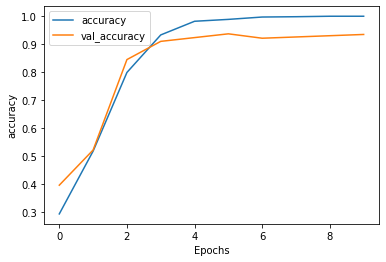

AttributeError: 'NoneType' object has no attribute 'savefig'

In [38]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    
    plt.xlabel("Epochs")
    plt.ylabel(string)
    #plt.savefig('acc.png')
    plt.legend([string, 'val_'+string])
    plt.savefig('graph.png')
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


In [36]:
txt = ["A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)


In [40]:
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment','unknown']

np.argmax(pred)
labels[1]
print(pred, labels[np.argmax(pred)])

[[5.7548656e-05 9.9554539e-01 1.4004463e-03 8.5879663e-05 2.7993079e-03
  1.1141914e-04]] bussiness
